# Construindo o Darknet

In [ ]:
!sudo apt-get install build-essential git libopencv-dev cmake

!nvidia-smi
!nvcc --version

!git clone https://github.com/hank-ai/darknet

# Build Darknet/YOLO
%mkdir -p /content/darknet/build
%cd /content/darknet/build
!cmake -DCMAKE_BUILD_TYPE=Release ..
%cd /content/darknet/build
!make -j $(nproc) package


!sudo dpkg -i darknet*.deb

!darknet --version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
git is already the newest version (1:2.34.1-1ubuntu1.15).
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/bin/bash: line 1: nvidia-smi: command not found
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
Cloning into 'darknet'...
remote: Enumerating objects: 20495, done.
remote: Counting objects: 100% (1305/1305), done.
remote: Compressing objects: 100% (255/255), done.
remote: Total 20495 (delta 1176), reused 1094 (delta 1049), pack-reused 19190 (from 3)
Receiving objects: 100% (20495/20495), 21.23 MiB | 20.60 MiB/s, done.


In [ ]:
!git clone https://github.com/jpierreribeiro/deteccaodepragas/


/content
Archive:  /content/btabaci.zip
   creating: btabaci/
  inflating: btabaci/1.jpg           
  inflating: btabaci/1.jpgZone.Identifier  
  inflating: btabaci/1.json          
  inflating: btabaci/1.txt           
  inflating: btabaci/10.json         
  inflating: btabaci/10.png          
  inflating: btabaci/10.pngZone.Identifier  
  inflating: btabaci/10.txt          
  inflating: btabaci/11.json         
  inflating: btabaci/11.png          
  inflating: btabaci/11.pngZone.Identifier  
  inflating: btabaci/11.txt          
  inflating: btabaci/12.json         
  inflating: btabaci/12.png          
  inflating: btabaci/12.pngZone.Identifier  
  inflating: btabaci/12.txt          
  inflating: btabaci/13.jpg          
  inflating: btabaci/13.jpgZone.Identifier  
  inflating: btabaci/13.json         
  inflating: btabaci/13.txt          
  inflating: btabaci/14.jpg          
  inflating: btabaci/14.jpgZone.Identifier  
  inflating: btabaci/14.json         
  inflating: btab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Treino

In [ ]:
!darknet detector -map -dont_show train /content/btabaci/btabaci.data /content/btabaci/btabaci.cfg | tee output.log

Streaming output truncated to the last 5000 lines.
rank=18300 of ranks=18395

  Id Name             AvgPrecision     TP     FN     FP     TN Accuracy ErrorRate Precision Recall Specificity FalsePosRate
  -- ----             ------------ ------ ------ ------ ------ -------- --------- --------- ------ ----------- ------------
   0 bt                    84.2276   6057   1059   1166  10113   0.8790    0.1210    0.8386 0.8512      0.8966       0.1034

for conf_thresh=0.25, precision=0.84, recall=0.85, F1 score=0.84
for conf_thresh=0.25, TP=6057, FP=1166, FN=1059, average IoU=63.58%
IoU threshold=50.00%, used area-under-curve for each unique recall
mean average precision (mAP@0.50)=84.23%
Total detection time: 2 seconds
Set -points flag:
 '-points 101' for MSCOCO
 '-points 11' for PascalVOC 2007 (uncomment 'difficult' in voc.data)
 '-points 0' (AUC) for ImageNet, PascalVOC 2010-2012, your custom dataset
New best mAP, saving weights!
Saving weights to /content/drive/MyDrive/Backup/btabaci_bes

In [ ]:
#Mostrar os resultados...
import cv2 as cv2
from matplotlib import pyplot as plt
img = cv2.imread('chart.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Checando resultados

Buildando DarkHelp

In [ ]:
!sudo apt-get install build-essential libtclap-dev libmagic-dev libopencv-dev
%cd /content

!git clone https://github.com/stephanecharette/DarkHelp.git
%cd /content/DarkHelp
%mkdir build
%cd build
!cmake -DCMAKE_BUILD_TYPE=Release ..
!make -j $(nproc) package
!sudo dpkg -i darkhelp*.deb
%cd ~
!DarkHelp --version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4+jammy1).
The following NEW packages will be installed:
  libmagic-dev libtclap-dev
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,683 kB of archives.
After this operation, 15.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libmagic-dev amd64 1:5.41-3ubuntu0.1 [105 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtclap-dev amd64 1.2.5-1 [2,578 kB]
Fetched 2,683 kB in 2s (1,601 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initia

In [ ]:
#import cv2 as cv2
#from matplotlib import pyplot as plt

#!darknet detector demo -dont_show /content/btv4/btv4.data /content/btv4/btv4.cfg /content/drive/MyDrive/artigocomputervision/btv4_best.weights *.mp4 -i 0 -thresh 0.25 -out_filename result.avi
!DarkHelp /content/btv4/btv4.cfg /content/btv4/tabaci.names /content/drive/MyDrive/artigocomputervision/btv4_best.weights bm.mp4
#img = cv2.imread('predictions.jpg')
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

-> config file:  /content/btv4/btv4.cfg
-> weights file: /content/drive/MyDrive/artigocomputervision/btv4_best.weights
-> names file:   /content/btv4/tabaci.names
-> driver:       Darknetd
0: compute_capability=750, cudnn_half=1, GPU=Tesla T4
Allocating workspace to transfer between CPU and GPU:  25.0 MiB
-> loading network took 635.077 milliseconds
-> neural network dimensions: 1024x1024
-> output directory: .
-> looking for image and video files
-> found 1 file
setting message: "press 'h' for help"
#1/1: loading "bm.mp4"
30.000000 FPS, 223 frames, 1080x1920 -> 1080x1920, 0m 7s
Caught exception: OpenCV(4.5.4) ./modules/highgui/src/window_gtk.cpp:635: error: (-2:Unspecified error) Can't initialize GTK backend in function 'cvInitSystem'



# Utilizando DarkHelp para analises com melhor desempenho.

/content/testing
DarkHelp v1.9.7-1
Darknet v4.0.52
class #0: 22.0% "mosca" at {'height': 91, 'width': 115, 'x': 2035, 'y': 954}
class #0: 23.2% "mosca" at {'height': 24, 'width': 23, 'x': 854, 'y': 983}
class #0: 25.7% "mosca" at {'height': 164, 'width': 160, 'x': 1263, 'y': 871}
class #0: 31.9% "mosca" at {'height': 109, 'width': 84, 'x': 757, 'y': 697}
class #0: 34.8% "mosca" at {'height': 29, 'width': 27, 'x': 889, 'y': 989}
class #0: 37.4% "mosca" at {'height': 123, 'width': 150, 'x': 586, 'y': 789}
class #0: 38.3% "mosca" at {'height': 26, 'width': 25, 'x': 848, 'y': 961}
class #0: 39.0% "mosca" at {'height': 149, 'width': 75, 'x': 1238, 'y': 755}
class #0: 39.4% "mosca" at {'height': 129, 'width': 141, 'x': 1971, 'y': 1372}
class #0: 42.5% "mosca" at {'height': 135, 'width': 123, 'x': 321, 'y': 940}
class #0: 44.7% "mosca" at {'height': 137, 'width': 122, 'x': 653, 'y': 1100}
class #0: 48.0% "mosca" at {'height': 144, 'width': 113, 'x': 561, 'y': 577}
class #0: 55.9% "mosca" at {

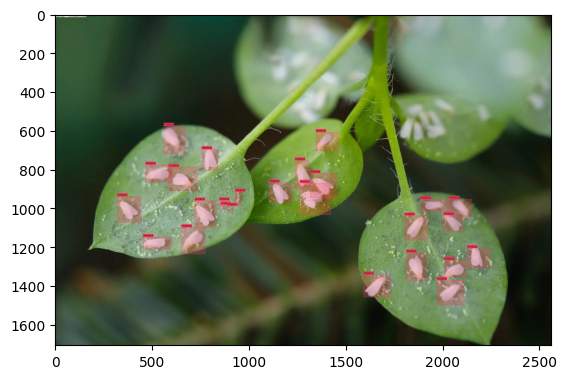

In [ ]:


%cd /content/testing

import DarkHelp
import json
from matplotlib import pyplot as plt

print("DarkHelp v" + DarkHelp.DarkHelpVersion().decode())
print("Darknet v" + DarkHelp.DarknetVersion().decode())

# Note the order in which the filenames are specified when constructing a
# DarkHelp object does not matter.  It will figure out which file is which.
dh = DarkHelp.CreateDarkHelpNN(
    "btv4.cfg".encode(),
    "btv4_best.weights".encode(),
    "tabaci.names".encode())
DarkHelp.EnableAnnotationAutoHideLabels(dh, False)
DarkHelp.EnableNamesIncludePercentage(dh, False)
DarkHelp.EnableSnapping(dh, False)
DarkHelp.EnableTiles(dh, False)
DarkHelp.SetThreshold(dh, 0.20)
DarkHelp.SetAnnotationLineThickness(dh, 1)

DarkHelp.PredictFN(dh, "15.jpg".encode())

DarkHelp.Annotate(dh, "output.jpg".encode())
img = plt.imread("output.jpg")
plt.imshow(img)

j = json.loads(DarkHelp.GetPredictionResults(dh))
for prediction in j['file'][0]['prediction']:
    if False:
        print(prediction)
    idx = prediction['best_class']
    name = prediction['name']
    prob = prediction['best_probability'] * 100.0
    x = prediction['rect']['x']
    y = prediction['rect']['y']
    w = prediction['rect']['width']
    h = prediction['rect']['height']
    print(f"class #{idx}: {prob:.1f}% \"{name}\" at {prediction['rect']}")

    if False:
        roi = img[y:y+h, x:x+w]
        plt.imshow(roi)

DarkHelp.DestroyDarkHelpNN(dh)
